**Linear regression**  
We have data in the form (𝑋1, 𝑌1) , … , (𝑋𝑛, 𝑌𝑛)
And assume that the relationship between variables is linear
$$Y_i = β_0 + β_1X_i + ε_i$$
Where
- 𝛽0 (beta 0) is the y-intercept  
- 𝛽1 (beta 1) is the slope  
- 𝜖𝑖 (ebsolom i) is the error (also called noise)  
- 𝔼(𝜖𝑖|𝑋𝑖) = 0  
- Var(𝜖𝑖|𝑋𝑖) = 𝜎^2

**Simple linear regression**  
The parameters 𝛽0 and 𝛽1 are unknown: we have to estimate them
We end up with 𝛽0 and 𝛽1 so the fitted line is
$$\hat{r}(x)=β_0 + β_1X$$
The predicted values are:
$$\hat{Y_i}=\hat{r}(X_i)$$
and the residuals are:
$$\hat{ε_i}=Y_i-\hat{Y_i}=Y_i-(\hat{β_0}+\hat{β_1}X_i)$$

By estimating the parameters and analyzing the residuals, linear regression allows us to understand and quantify the relationship between variables and make predictions based on the fitted model.

**Least squares estimators**  
Determining the best estimate  
In general, it is impossible to find a line that passes over all the points  
$$\hat{r}(x)=\hat{β_0}+\hat{β_1}X$$
The best fitted line is the one with the best estimators $$\hat{β_0}+\hat{β_1}$$

**Least squares regression**  
Approach: Minimize the Mean Square Error (MSE) for the residuals
$$\hat{ε_i}=Y_i-(\hat{β_0}+\hat{β_1}X_i)$$

Specifically, we minimize the Residual Sum of Squares (RSS)
$$\min_{\hat{\beta}_0, \hat{\beta}_1} \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i))^2$$

**Finding the least squares eastimates**  
The symbol 
$$\partial$$
represents the partial derivative in mathematics. It is used to denote the derivative of a multivariable function with respect to a specific variable while holding the other variables constant. The symbol is often written as a rounded d to indicate a partial derivative.

$$\hat{\beta_1}: \frac{\partial\sum_{i=1}^{n}(y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i))^2}{\partial\beta_1}= 0 $$  

$$\hat{\beta_0}: \frac{\partial\sum_{i=1}^{n}(y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i))^2}{\partial\beta_0}= 0 $$  

least sqaures eastimators: [-2825.9168242  12245.74669187]


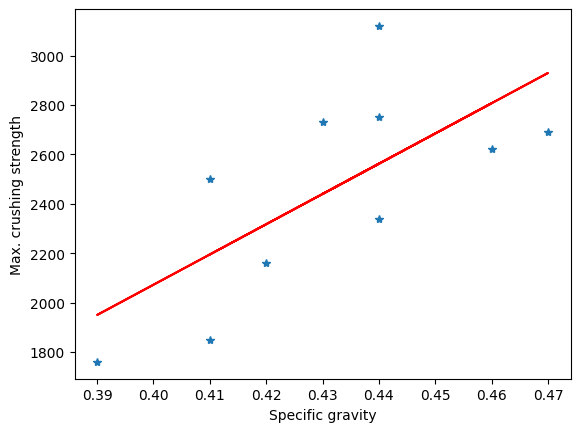

b) Regression coefficients: [-2825.9168242  12245.74669187]
c) Predicted maximum crushing strength: 2439.754253308128
d) Estimated variance of an individual response: 105660.06616257076


In [18]:
import numpy as np
import matplotlib.pyplot as plt
#Opgave chapeter 9, problem 4 og 9
#a)Plot a scatter diagram. Does a linear relationship seem reasonable?
#b) Estimate the regression coefficients.
#c) Predict the maximum crushing strength of a wood sample whose specific gravity is 0.43.
#d) Estimate the variance of an individual response.

# Number of data points
n = 10

# Given data
x = np.array([0.41, 0.46, 0.44, 0.47, 0.42, 0.39, 0.41, 0.44, 0.43, 0.44])
y = np.array([1850, 2620, 2340, 2690, 2160, 1760, 2500, 2750, 2730, 3120])

# Add column of ones to x for intercept term
x = np.column_stack((np.ones(n), x))

# Calculate the least squares estimators
B = np.linalg.lstsq(x, y, rcond=None)[0]
print("least sqaures eastimators:", B)
# Plot the data points and the fitted line
plt.plot(x[:, 1], y, '*', x[:, 1], B[0] + B[1] * x[:, 1], 'r-')
plt.xlabel('Specific gravity')
plt.ylabel('Max. crushing strength')
plt.show()


meanx = np.mean(x[:, 1])
Sxx = np.sum((x[:, 1] - meanx) ** 2)
Sxy = B[1] * Sxx
meany = np.mean(y)
Syy = np.sum((y - meany) ** 2)
SSR = (Sxx * Syy - Sxy ** 2) / Sxx
sigma2 = SSR / (n - 2)

print("b) Regression coefficients:", B)
specific_gravity = 0.43
predicted_strength = B[0] + B[1] * specific_gravity
print("c) Predicted maximum crushing strength:", predicted_strength)
print("d) Estimated variance of an individual response:", sigma2)



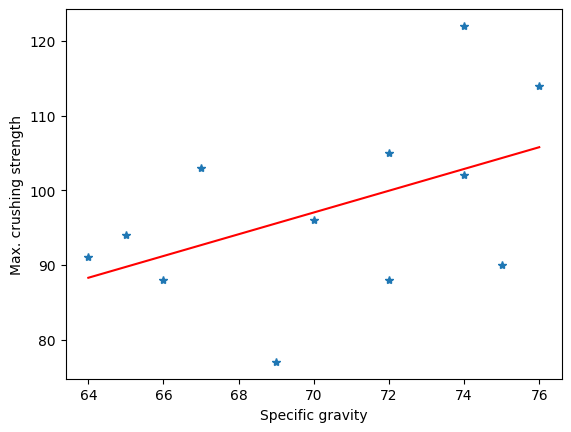

critical_value: 2.2281388519649385
test_statistic: 1.7483281067751313
Fail to reject the null hypothesis


In [17]:
import numpy as np
from scipy.stats import t
#Opgave chapter 9 problem 12
#The following data set presents the heights of 12 male law school classmates whose law school
#examination scores were roughly equal. It also gives their annual salaries 5 years after graduation.
#Each of them went into corporate law. The height is in inches and the salary in units of $1,000.
#a) Do the above data establish the hypothesis that a lawyer’s salary is related to his height?
#Use the 5 percent level of significance.
#b) What was the null hypothesis in part a)

n = 12 # amount of data

# Given data
x = np.array([64, 65, 66, 67, 69, 70, 72, 72, 74, 74, 75, 76])
y = np.array([91, 94, 88, 103, 77, 96, 105, 88, 122, 102, 90, 114])

# Add column of ones to x for intercept term
x = np.column_stack((np.ones(n), x))

# Calculate the least squares estimators
B = np.linalg.lstsq(x, y, rcond=None)[0]

# Calculate the mean of x
meanx = np.mean(x[:, 1])

# Calculate Sxx = sum squared
Sxx = np.sum((x[:, 1] - meanx) ** 2)

# Calculate Sxy
Sxy = B[1] * Sxx

# Calculate the mean of y
meany = np.mean(y)

# Calculate Syy
Syy = np.sum((y - meany) ** 2)

# Calculate SSR 
SSR = (Sxx * Syy - Sxy ** 2) / Sxx

# Calculate sigma squared
sigma2 = SSR / (n - 2)

# Calculate the test statistics
TS = np.sqrt((n - 2) * Sxx / SSR) * np.abs(B[1])

# Calculate the t-value at alpha = 0.025 and degrees of freedom = 10
t_0025_10 = np.abs(t.ppf(0.025, 10))

# Plot the data points and the fitted line
plt.plot(x[:, 1], y, '*', x[:, 1], B[0] + B[1] * x[:, 1], 'r-')
plt.xlabel('Specific gravity')
plt.ylabel('Max. crushing strength')
plt.show()

# Define the significance level (alpha)
alpha = 0.05

# Calculate the test statistic
test_statistic = TS

# Calculate the critical value for a two-tailed test
critical_value = t.ppf(1 - alpha / 2, n - 2)
print("critical_value:", critical_value)
print("test_statistic:", test_statistic)
# Compare the test statistic with the critical value
if np.abs(test_statistic) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Least squares estimators: [2.45456771e+00 1.67913698e-04]


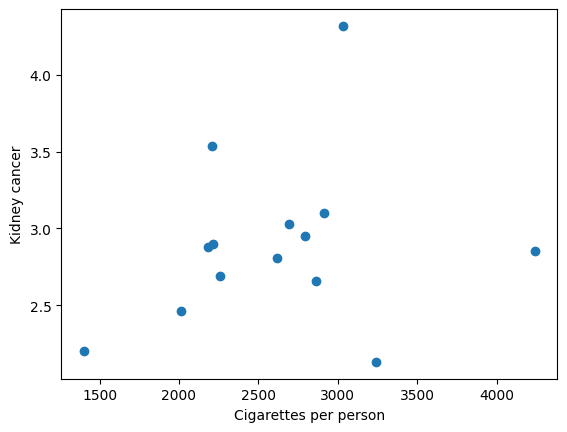

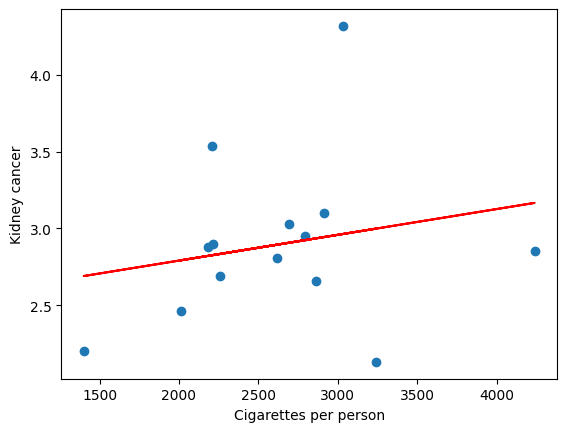

p-value: 0.9999995963236239
90% confidence interval: -588156.9528685211 588163.0038170972


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
#chapter 9 problem 21
#a) Draw a scatter diagram of cigarette use versus death rate from kidne cancer.
#b) Estimate the regression line.
#c) What is the p-value in the test that the slope of the regression line is 0?
#d) Determine a 90% confidence interval for the mean death rate from kidney cancer in a state
#whose citizens smoke an average of 3,400 cigarettes per year

# Number of data points
n = 14

# Given data
x = np.array([2860, 2010, 2791, 2618, 2212, 2184, 3244, 2692, 2206, 2914, 3034, 4240, 1400, 2257])
y = np.array([2.66, 2.46, 2.95, 2.81, 2.90, 2.88, 2.13, 3.03, 3.54, 3.1, 4.32, 2.85, 2.2, 2.69])

# Add column of ones to x for intercept term
x = np.column_stack((np.ones(n), x))

# Calculate the least squares estimators
B = np.linalg.lstsq(x, y, rcond=None)[0]
print("Least squares estimators:", B)

# a) Plot the scatter diagram
plt.scatter(x[:, 1], y)
plt.xlabel('Cigarettes per person')
plt.ylabel('Kidney cancer')
plt.show()

# b) Plot the regression line
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], B[0] + B[1] * x[:, 1], 'r-')
plt.xlabel('Cigarettes per person')
plt.ylabel('Kidney cancer')
plt.show()

# c) Calculate the p-value
meanx = np.mean(x[:, 1])
Sxx = np.sum((x[:, 1] - meanx) ** 2)
SSR = (n - 2) * sigma2 * Sxx
TS = B[1] / np.sqrt(SSR / ((n - 2) * Sxx))
pvalue = 2 * (1 - t.cdf(np.abs(TS), n - 2))
print("p-value:", pvalue)

# d) Calculate the confidence interval
x0 = 3400
Delta = np.sqrt(1/n + (x0 - meanx)**2 / Sxx) * np.sqrt(SSR / (n - 2)) * t.ppf(0.95, n - 2)
C_low = B[0] + B[1] * x0 - Delta
C_up = B[0] + B[1] * x0 + Delta
print("90% confidence interval:", C_low, C_up)
